In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [333]:
a = 2
b = 1
rx = 1.2
ry = 1
min_T = 1e-5

In [334]:
def isIn(x,y,a,b,rx,ry,v0,min_T):
    if abs(y) > b:
        return False
    x = abs(x)
    #x += min_T*v0
    right_eq = (x-a)**2/(rx)**2 + (y)**2/(ry)**2
    if x>a and right_eq>1:
        return False

    return True

In [335]:
def rate(x,y,a,b,rx,ry,v0,min_T):
    x += 0.5
    y += 0.5
    if abs(y) > b:
        return 1e-8
    x = abs(x)
    x += min_T*v0
    right_eq = (x-a)**2/(rx)**2 + (y)**2/(ry)**2
    if x>a and right_eq>1:
        return 1e-8

    return True

In [336]:
def shape(x, y, a, b, rx, ry):
    x = abs(x)
    if x <= a:
        return abs(y) / y * b

    if x > a:
        newY = ((ry) ** 2 * (1 - (x - a) ** 2 / (rx) ** 2)) ** 0.5
        if abs(y)==y:
            return newY
        else:
            return -newY

In [337]:
def derivitive(x,y,a,b,rx,ry):
    min_X = 1e-15
    return (shape(x+min_X,y,a,b,rx,ry)-shape(x-min_X,y,a,b,rx,ry))/(2*min_X)

In [307]:
def makeAnglePositive(theta):
    if theta<0:
        return theta+np.pi
    return theta

In [328]:
x = 3.1
y = 0
v0 = 1
theta = 0
theta *= np.pi/180
min_T = 1e-3
vx = v0 * np.cos(theta)
vy = v0 * np.sin(theta)

In [329]:
derivitive(3.2,0,a,b,rx,ry)

(-16660004.68656264+21073424.255447015j)

In [330]:
points = []
for i in range(50000):
    points.append([x, y])
    if(not isIn(x,y,a,b,rx,ry,v0,min_T)):
        x -= min_T * vx
        y -= min_T * vy
        min_T /=2
        print(min_T)
        
    if min_T<1e-14:
        min_T = 1e-3
        alpha = makeAnglePositive(math.atan(derivitive(x,y,a,b,rx,ry))) - theta - np.pi/2
        theta += 2*alpha + np.pi
        vx = v0 * np.cos(theta)
        vy = v0 * np.sin(theta)

    x += min_T * vx
    y += min_T * vy

0.0005
0.00025
0.000125
6.25e-05
3.125e-05
1.5625e-05
7.8125e-06
3.90625e-06
1.953125e-06
9.765625e-07
4.8828125e-07
2.44140625e-07
1.220703125e-07
6.103515625e-08
3.0517578125e-08
1.52587890625e-08
7.62939453125e-09
3.814697265625e-09
1.9073486328125e-09
9.5367431640625e-10
4.76837158203125e-10
2.384185791015625e-10
1.1920928955078125e-10
5.960464477539063e-11
2.980232238769531e-11
1.4901161193847657e-11
7.450580596923828e-12
3.725290298461914e-12
1.862645149230957e-12
9.313225746154785e-13
4.656612873077393e-13
2.3283064365386963e-13
1.1641532182693482e-13
5.820766091346741e-14
2.9103830456733704e-14
1.4551915228366852e-14
7.275957614183426e-15
0.0005
0.00025
0.000125
6.25e-05
3.125e-05
1.5625e-05
7.8125e-06
3.90625e-06
1.953125e-06
9.765625e-07
4.8828125e-07
2.44140625e-07
1.220703125e-07
6.103515625e-08
3.0517578125e-08
1.52587890625e-08
7.62939453125e-09
3.814697265625e-09
1.9073486328125e-09
9.5367431640625e-10
4.76837158203125e-10
2.384185791015625e-10
1.1920928955078125e-10
5.9

In [331]:
points

[[3.1, 0],
 [np.float64(3.101), np.float64(0.0)],
 [np.float64(3.102), np.float64(0.0)],
 [np.float64(3.1029999999999998), np.float64(0.0)],
 [np.float64(3.1039999999999996), np.float64(0.0)],
 [np.float64(3.1049999999999995), np.float64(0.0)],
 [np.float64(3.1059999999999994), np.float64(0.0)],
 [np.float64(3.1069999999999993), np.float64(0.0)],
 [np.float64(3.107999999999999), np.float64(0.0)],
 [np.float64(3.108999999999999), np.float64(0.0)],
 [np.float64(3.109999999999999), np.float64(0.0)],
 [np.float64(3.110999999999999), np.float64(0.0)],
 [np.float64(3.1119999999999988), np.float64(0.0)],
 [np.float64(3.1129999999999987), np.float64(0.0)],
 [np.float64(3.1139999999999985), np.float64(0.0)],
 [np.float64(3.1149999999999984), np.float64(0.0)],
 [np.float64(3.1159999999999983), np.float64(0.0)],
 [np.float64(3.116999999999998), np.float64(0.0)],
 [np.float64(3.117999999999998), np.float64(0.0)],
 [np.float64(3.118999999999998), np.float64(0.0)],
 [np.float64(3.119999999999998), n

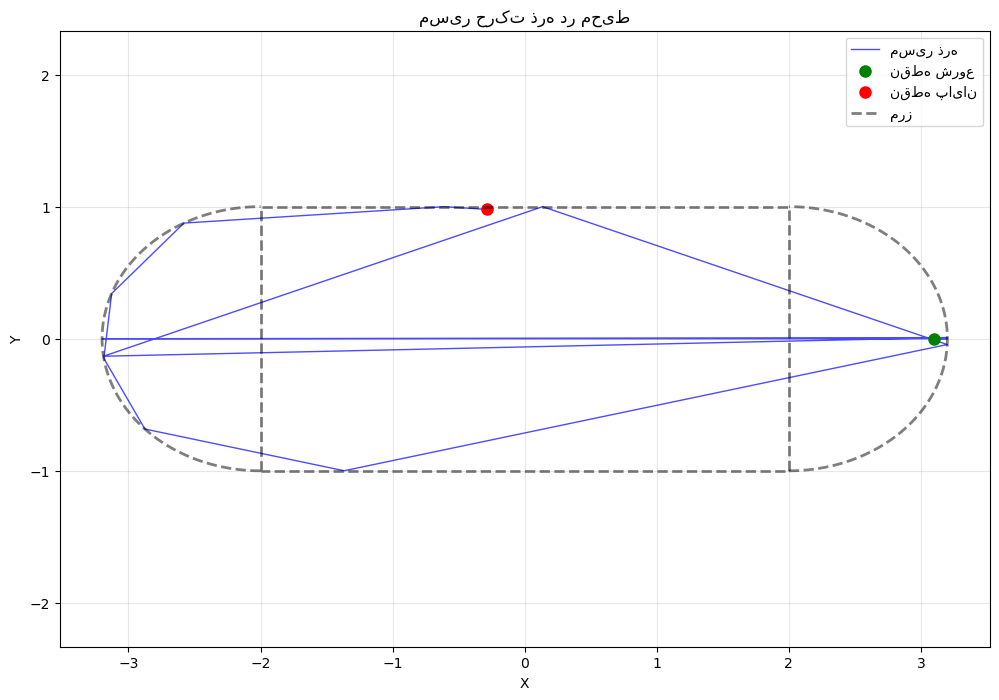

تعداد نقاط: 50000
محدوده X: -3.200 تا 3.201
محدوده Y: -1.000 تا 1.000


In [332]:
# رسم مسیر ذره
plt.figure(figsize=(12, 8))

# استخراج مختصات x و y از points
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

# رسم مسیر
plt.plot(x_coords, y_coords, 'b-', linewidth=1, alpha=0.7, label='مسیر ذره')
plt.plot(x_coords[0], y_coords[0], 'go', markersize=8, label='نقطه شروع')
plt.plot(x_coords[-1], y_coords[-1], 'ro', markersize=8, label='نقطه پایان')

# رسم مرز شکل (تقریبی)
# بخش مستطیلی
rect_x = [-a, -a, a, a, -a]
rect_y = [-b, b, b, -b, -b]
plt.plot(rect_x, rect_y, 'k--', linewidth=2, alpha=0.5, label='مرز')

# بخش بیضوی راست
theta_ellipse = np.linspace(-np.pi/2, np.pi/2, 100)
ellipse_x = a + rx * np.cos(theta_ellipse)
ellipse_y = ry * np.sin(theta_ellipse)
plt.plot(ellipse_x, ellipse_y, 'k--', linewidth=2, alpha=0.5)

# بخش بیضوی چپ
ellipse_x_left = -a - rx * np.cos(theta_ellipse)
plt.plot(ellipse_x_left, ellipse_y, 'k--', linewidth=2, alpha=0.5)

plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('مسیر حرکت ذره در محیط')
plt.legend()
plt.show()

print(f"تعداد نقاط: {len(points)}")
print(f"محدوده X: {min(x_coords):.3f} تا {max(x_coords):.3f}")
print(f"محدوده Y: {min(y_coords):.3f} تا {max(y_coords):.3f}")